<h1>Binary Classifier Raw Score Evaluation</h1>

<q><i>The actual output of many binary classification algorithms is a prediction score. The score indicates the system’s certainty that the given observation belongs to the positive class</i></q><br>

To convert this raw score to a positive or negative class, we need to specify a cut-off. A sample with score greater than the cut-off is classified as positive class and a sample with score less than the cut-off is classified as negative class.

We need to now assess how algorithm would behave under different classification thresholds.  Instead of manually performing this step, we can compute "AUC" metric.  AUC refers to Area Under Curve.  The curve here refers to the plot that has Probability of False Alarm (False Positive Rate) in X-Axis and Probability of Detection (Recall) in Y-Axis. By plotting False Alarm vs Recall at different cut-off thresholds, we can form a curve.  AUC measures the area under this curve.

Common Techniques for evaluating performance:<br>
<li>Visually observe raw score using Plots</li>
<li>Evaluate Area Under Curve (AUC) Metric</li>


Reference:<br>
https://en.wikipedia.org/wiki/Receiver_operating_characteristic

<q>AUC is a different type of metric. It measures the ability of the model to predict a higher score for positive examples as compared to negative examples. Since AUC is independent of the selected threshold, you can get a sense of the prediction performance of your model from the AUC metric without picking a threshold.</q>

Reference:<br>
https://docs.aws.amazon.com/machine-learning/latest/dg/binary-classification.html

In this example, let's look at how to compute AUC metric from raw scores and use that to compare model performance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

<h2>Exam Result Data set</h2>
This dataset contains Actual Pass or Fail for each sample. Model Prediction columns contains raw scores that the models came up with for that sample
<h3>Columns</h3>
<li>Pass = Actual Pass or Fail for the sample</li>
<li>Model1_Prediction = Raw scores predicted by model 1</li>
<li>Model2_Prediction = Raw scores predicted by model 2</li>
<li>Model3_Prediction = Raw scores predicted by model 3</li>
<li>Model4_Prediction = Raw scores predicted by model 4</li>
<p>We are going to compare performance of these four models</p>

Hours Spent and Exam Result (Pass/Fail) Data set:<br>
https://en.wikipedia.org/wiki/Logistic_regression

In [2]:
models = ['Model 1','Model 2', 'Model 3', 'Model 4']
df = pd.read_csv('HoursExamSampleRawScore.csv')

In [3]:
df

,Hours,Pass,Model1_Prediction,Model2_Prediction,Model3_Prediction,Model4_Prediction
0,0.50,0,0.12,0.22,0.01,0.53
1,0.75,0,0.23,0.27,0.09,0.51
2,1.00,0,0.31,0.28,0.13,0.96
3,1.25,0,0.35,0.17,0.15,0.75
4,1.50,0,0.42,0.42,0.20,0.50
5,1.75,0,0.52,0.08,0.21,0.82
6,1.75,1,0.52,0.34,0.27,0.99
7,2.00,0,0.55,0.10,0.31,0.87
8,2.25,1,0.62,0.37,0.32,0.78
9,2.50,0,0.66,0.26,0.38,0.62


## Plot Data
Compare performance visually <br>

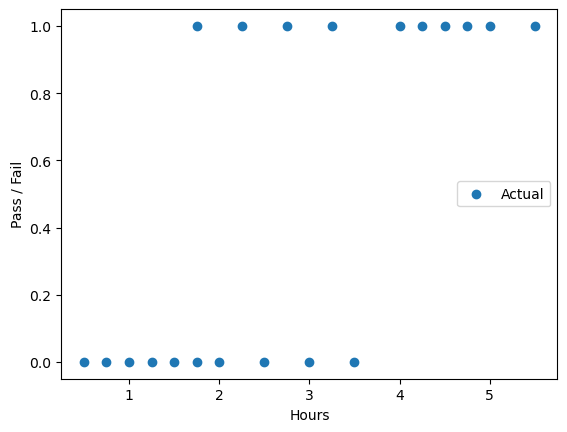

In [4]:
plt.figure()
plt.scatter(df['Hours'],df['Pass'],label='Actual')
plt.legend(loc=7)
plt.xlabel('Hours')
plt.ylabel('Pass / Fail')
plt.show()

<h4>All scores above cut-off threshold are considered Pass</h4>

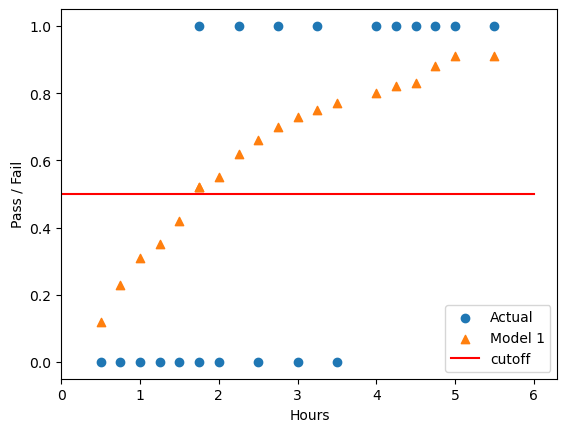

In [5]:
# Compare performance of Actual and Model 1 Prediction
plt.figure()
plt.scatter(df['Hours'],df['Pass'],label='Actual')
plt.scatter(df['Hours'],df['Model1_Prediction'],label='Model 1',marker='^')
plt.plot([0,6],[0.5,0.5],color='r',label='cutoff')
plt.xlim(left=0)
plt.xlabel('Hours')
plt.ylabel('Pass / Fail')
plt.legend(loc=4)
plt.show()

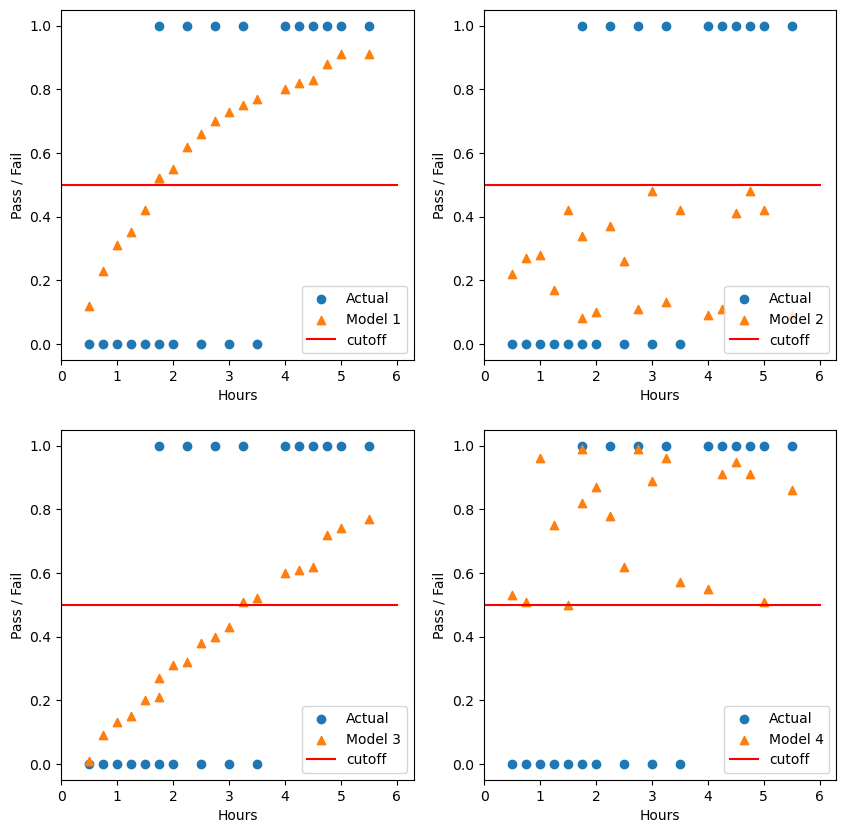

In [6]:
plt.figure(figsize=(10,10))

for idx, model in enumerate(models):
    plt.subplot(2,2,idx+1)
    
    plt.scatter(df['Hours'],df['Pass'],label='Actual')
    plt.scatter(df['Hours'],df[model.replace(' ','') + '_Prediction'],
                label=model,marker='^')
    plt.plot([0,6],[0.5,0.5],color='r',label='cutoff')
    plt.xlim(left=0)
    plt.legend(loc=4)
    plt.xlabel('Hours')
    plt.ylabel('Pass / Fail')

From the plots, we can observe that:<br>
<li>Model 1 assigns a score that increases with number of hours spent studying.  Model assigned score crosses cut-off threshold of 0.5 at around 1.5 hours of study time</li>
<li>Model 2 has raw score of less than 0.5 for all samples</li>
<li>Model 3 assigns a score that linearly changes with hours spent studying.  Model assigned score crosses cut-off threshold of 0.5 at around 3 hours of study time</li>
<li>Model 4 has raw score of greater than 0.5 for all samples</li>

<h2>Area Under Curve Metrics</h2>

In [7]:
from sklearn.metrics import roc_auc_score

In [8]:
print ('AUC Score')
for model in models:
    roc_score = roc_auc_score(df['Pass'], df[model.replace(' ','') + '_Prediction'])
    print(' {0}: {1:.3f}'.format(model,roc_score))

AUC Score
 Model 1: 0.895
 Model 2: 0.465
 Model 3: 0.900
 Model 4: 0.740


<h2>Summary</h2>

Models with AUC scores closer to 1 performs better

Models with AUC score close to 0.5 is the baseline and it represents random-guessing

Models with AUC score close to 0 is mis-classfying 1's as 0's and 0's as 1's


From these metrics, we can see that Model 1 and Model 3 are performing better than Model 2 and 4.<br><br>
Between Model 1 and 3, Model 1 has higher Recall (it correctly identifies more positive samples) at the cost of higher False Positive Rate (negative samples were misclassified as positive)
<br>Model 3 offers balanced performance